In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz
!pip install -q findspark

In [3]:
import os
import findspark
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"
findspark.init()
import pyspark.pandas as ps
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [5]:
file = "/content/spotify_songs.csv"
data = pd.read_csv(file)

In [6]:
df = ps.DataFrame(data).head(50000)
df.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4,1999,11/2/1999
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4,1999,11/2/1999
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4,1999,11/2/1999
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4,1999,11/2/1999
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4,1999,11/2/1999


Clean Data and split into multiple data frames

In [7]:
df = df.dropna()

In [10]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50000 non-null  object 
 1   name              50000 non-null  object 
 2   album             50000 non-null  object 
 3   album_id          50000 non-null  object 
 4   artists           50000 non-null  object 
 5   artist_ids        50000 non-null  object 
 6   track_number      50000 non-null  int64  
 7   disc_number       50000 non-null  int64  
 8   explicit          50000 non-null  bool   
 9   danceability      50000 non-null  float64
 10  energy            50000 non-null  float64
 11  key               50000 non-null  int64  
 12  loudness          50000 non-null  float64
 13  mode              50000 non-null  int64  
 14  speechiness       50000 non-null  float64
 15  acousticness      50000 non-null  float64
 16  instrumentalness  50000 non-null  flo

shrink the memory used by the df to speed up processing

In [24]:
print(np.iinfo(np.int8).max)
print(np.iinfo(np.int16).max)
print(np.iinfo(np.int32).max)
print(np.finfo(np.float16).resolution)
print(np.finfo(np.float32).resolution)

127
32767
2147483647
0.001
1e-06


In [18]:
print(f"track_number {df['track_number'].max()} - {df['track_number'].min()}")
print(f"disc_number {df['disc_number'].max()} - {df['disc_number'].min()}")
print(f"danceability {df['danceability'].max()} - {df['danceability'].min()}")
print(f"energy {df['energy'].max()} - {df['energy'].min()}")
print(f"key {df['key'].max()} - {df['key'].min()}")
print(f"loudness {df['loudness'].max()} - {df['loudness'].min()}")
print(f"mode {df['mode'].max()} - {df['mode'].min()}")
print(f"speechiness {df['speechiness'].max()} - {df['speechiness'].min()}")
print(f"acousticness {df['acousticness'].max()} - {df['acousticness'].min()}")
print(f"instrumentalness {df['instrumentalness'].max()} - {df['instrumentalness'].min()}")
print(f"liveness {df['liveness'].max()} - {df['liveness'].min()}")
print(f"valence {df['valence'].max()} - {df['valence'].min()}")
print(f"tempo {df['tempo'].max()} - {df['tempo'].min()}")
print(f"duration_ms {df['duration_ms'].max()} - {df['duration_ms'].min()}")
print(f"time_signature {df['time_signature'].max()} - {df['time_signature'].min()}")
print(f"year {df['year'].max()} - {df['year'].min()}")

track_number 50 - 1
disc_number 6 - 1
danceability 0.987 - 0.0
energy 1.0 - 0.0
key 11 - 0
loudness 3.802 - -60.0
mode 1 - 0
speechiness 0.966 - 0.0
acousticness 0.996 - 0.0
instrumentalness 1.0 - 0.0
liveness 1.0 - 0.0
valence 1.0 - 0.0
tempo 231.028 - 0.0
duration_ms 6054655 - 1000
time_signature 5 - 0
year 2020 - 1928


In [21]:
df = df.astype({"track_number":"int8",
           "disc_number":"int8",
           "danceability":"float32",
           "energy":"float32",
           "key":"int8",
           "loudness":"float32",
           "mode":"int8",
           "speechiness":"float32",
           "acousticness":"float32",
           "instrumentalness":"float32",
           "liveness":"float32",
           "valence":"float32",
           "tempo":"float32",
           "duration_ms":"int32",
           "time_signature":"int8",
           "year":"int16"})

In [22]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50000 non-null  object 
 1   name              50000 non-null  object 
 2   album             50000 non-null  object 
 3   album_id          50000 non-null  object 
 4   artists           50000 non-null  object 
 5   artist_ids        50000 non-null  object 
 6   track_number      50000 non-null  int8   
 7   disc_number       50000 non-null  int8   
 8   explicit          50000 non-null  bool   
 9   danceability      50000 non-null  float32
 10  energy            50000 non-null  float32
 11  key               50000 non-null  int8   
 12  loudness          50000 non-null  float32
 13  mode              50000 non-null  int8   
 14  speechiness       50000 non-null  float32
 15  acousticness      50000 non-null  float32
 16  instrumentalness  50000 non-null  flo

In [26]:
df["release_date"] = ps.to_datetime(df["release_date"],errors='ignore')

In [27]:
df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype     
---  ------            --------------  -----     
 0   id                50000 non-null  object    
 1   name              50000 non-null  object    
 2   album             50000 non-null  object    
 3   album_id          50000 non-null  object    
 4   artists           50000 non-null  object    
 5   artist_ids        50000 non-null  object    
 6   track_number      50000 non-null  int8      
 7   disc_number       50000 non-null  int8      
 8   explicit          50000 non-null  bool      
 9   danceability      50000 non-null  float32   
 10  energy            50000 non-null  float32   
 11  key               50000 non-null  int8      
 12  loudness          50000 non-null  float32   
 13  mode              50000 non-null  int8      
 14  speechiness       50000 non-null  float32   
 15  acousticness      50000 non-null 

1. The app should display the top songs in our archive ranked by danceability
2. There should be a filter for explicit songs
3. There should be an option to search for song names, artist names, and album names.
4. Albums and Artists should be ranked by their average and maximum danceability
5. Users should be able to further filter the songs by energy, key, loudness, mode,
speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration.

The app should display the top songs in our archive ranked by danceability

In [28]:
dance_sort = df.sort_values(by="danceability",ascending=False)
dance_sort.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
20276,1lg8jBYb5JVW5YhSJZAdbg,Plus Something Else - Remastered Version,Touch (Reissue - Deluxe Edition),4pGwe5BW8GVtIP8ruoa1jB,"['Eurythmics', 'Annie Lennox', 'Dave Stewart']","['0NKDgy9j66h3DLnN8qu1bB', '5MspMQqdVbdwP6ax3G...",12,1,False,0.987,0.632,0,-8.591,1,0.2480,0.063800,0.83700,0.326,0.962,118.130997,320400,4,1983,1983-11-14
35113,1FGJpbOaylFVmrQzhxEFL2,ääniesineitâ 2,ääniesineitâ,1rCkobvYfyh8rSlbjpJEDl,['antti rannisto'],['7aBQK62NiZmFakXUCkOLIO'],2,1,False,0.987,0.396,1,-16.763,0,0.1330,0.996000,0.97000,0.110,0.600,119.976997,216107,4,2005,2005-11-01
11611,6v6qaBadnFfifpWIfuGDCC,Good Girl,Backstroke,5BhtJUxeN3wEcpZXqAtgwW,['Matthew Dear'],['2GLf7iaOOujAem5R87xwto'],7,1,False,0.982,0.502,7,-11.115,1,0.2600,0.085800,0.09810,0.101,0.776,124.990997,219000,4,2004,2004-07-13
45967,0zzAEVOWyl5qMzIkOM3GBc,In Tyrannis 2006,Total 7,2LFhddcUVlIlZU4aynkeR6,['Wassermann'],['0i2Q9WRxWu788ndngfKT26'],2,2,False,0.982,0.329,1,-9.097,1,0.2440,0.005810,0.62400,0.103,0.705,122.074997,254760,4,2006,2006-08-21
46479,1YiP2YAeGBIhWFJCTt1F7F,Shake It Baby - Main Version - Explicit,Blow The Whistle,5GiqXho2S6vfntgRwSdhYp,['Too $hort'],['4sb7rZNN93BSS6Gqgepo4v'],16,1,False,0.981,0.687,11,-7.415,1,0.0684,0.000028,0.00722,0.102,0.719,112.995003,208160,4,2006,2006-08-28


There should be a filter for explicit songs

In [81]:
def get_explicit(val = False):
  return df[df["explicit"] == val]

In [82]:
no_explicit = get_explicit(False)
no_explicit.head()

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.026100,0.000011,0.3560,0.503,117.905998,210133,4,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.023400,0.000002,0.1220,0.370,149.748993,298893,4,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.001620,0.105000,0.0789,0.539,127.058998,205600,4,1999,1999-11-02
5,2LXPNLSMAauNJfnC58lSqY,Born of a Broken Man,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],6,1,False,0.298,0.848,2,-5.947,1,0.0727,0.053800,0.001520,0.2010,0.194,148.281998,280960,4,1999,1999-11-02
6,3moeHk8eIajvUEzVocXukf,Born As Ghosts,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],7,1,False,0.417,0.976,9,-6.032,1,0.1750,0.000427,0.000134,0.1070,0.483,90.394997,202040,4,1999,1999-11-02


There should be an option to search for song names, artist names, and album names.

In [78]:
def search(by="song",search="Born As Ghosts",show = 5):
  if by.lower() in ["song","songs","song name","songname"]:
    return df[df["name"] == search].head(show)
  elif by.lower() in ["artist","artists","artist name","artistname"]:
    return df[df["artists"].apply(lambda x: search in x)].head(show)
  elif by.lower() in ["album","albums","album name","albumname"]:
    return df[df["album"] == search].head(show)

In [75]:
song_name = "Born As Ghosts"
search("song",song_name)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
6,3moeHk8eIajvUEzVocXukf,Born As Ghosts,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],7,1,False,0.417,0.976,9,-6.032,1,0.175,0.000427,0.000134,0.107,0.483,90.394997,202040,4,1999,1999-11-02


In [79]:
artist_name = "Rage Against The Machine"
search("artist",artist_name)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.905998,210133,4,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680000,206200,4,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.748993,298893,4,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.751999,213640,4,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.058998,205600,4,1999,1999-11-02


In [80]:
album_name = "The Battle Of Los Angeles"
search("album",album_name)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.905998,210133,4,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680000,206200,4,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.748993,298893,4,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.751999,213640,4,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.058998,205600,4,1999,1999-11-02


Albums and Artists should be ranked by their average and maximum danceability

In [69]:
def rank(this="album",by="average",show=5):
  if by.lower() in ["average","mean"]:
    return df.groupby(this).mean().sort_values(by="danceability",ascending=False)[["danceability"]].head(show)
  elif by.lower() in ["max","high","maximum"]:
    return df.groupby(this).max().sort_values(by="danceability",ascending=False)[["danceability"]].head(show)
  elif by.lower() in ["min","low","minimum"]:
    return df.groupby(this).min().sort_values(by="danceability",ascending=False)[["danceability"]].head(show)

In [70]:
rank()

,danceability
album,
All About That Bass Parody,0.943
"Любил, как мог",0.929
Roc Star - Single,0.927
Speed It Up,0.912
"Thotiana (feat. Cardi B, YG) [Remix]",0.911


In [71]:
rank("artists")

,danceability
artists,
['Wassermann'],0.982
"['DRE-B', 'Lul Florida']",0.980
"['Bob Marley & The Wailers', 'Afrodisiac Soundsystem']",0.963
"['Megan Thee Stallion', 'DaBaby']",0.956
"['Keak Da Sneak', 'P.S.D.']",0.955


In [72]:
rank("artists","max")

,danceability
artists,
"['Eurythmics', 'Annie Lennox', 'Dave Stewart']",0.987
['antti rannisto'],0.987
['Matthew Dear'],0.982
['Wassermann'],0.982
['Too $hort'],0.981


In [73]:
rank("album","max")

,danceability
album,
Touch (Reissue - Deluxe Edition),0.987
ääniesineitâ,0.987
Backstroke,0.982
Total 7,0.982
Blow The Whistle,0.981


Users should be able to further filter the songs by energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration.

In [44]:
def filter_songs(min:float = 0.0, max:float = 10.0,on:str = "energy"):
  return df[(df[on] >= min) & (df[on] <= max)]

In [45]:
filter_songs(min=.5,max=1,on="loudness")

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
17241,5SMVwkdLLFHwNBAjZvqok4,Emission,Tauromachine,1rQnN6z0AnwxY1iGruHgrl,['Merzbow'],['5UezsklPScipW64XJm7qql'],2,1,False,0.352,0.868,1,0.982,1,0.3410,0.04590,0.01260,0.609,0.0351,126.518997,245933,4,1998,1998-01-01
25250,7bmw5IbvNGTQu676CQq3pm,Not A Problem,Let It Bloom,0e0XOJPRRorsV5PuRkyIn8,['Black Lips'],['35C0NSLogAwImm8HAMqEmG'],5,1,False,0.329,0.971,7,0.525,1,0.0482,0.03830,0.91000,0.324,0.5560,143.408997,181093,4,2005,2005-11-22
37795,6kZ7csiZhHg0pm6Q60CAnd,Phat Rack - Original Mix,Untapped Vol. 8,6COtP7IBNSULj4DrYB5qx0,['Zetta'],['2n5o9gd7McltFEHEFMnqMu'],4,1,False,0.732,0.952,0,0.739,1,0.3010,0.00483,0.00394,0.386,0.2330,75.022003,256000,4,2020,2020-05-25
47617,5m928GQbOSTBqk3HiGo4J5,Hospitality,Hospitality,4S3nBwcpCioyRWs8VxaCEb,['Venetian Snares'],['7eKIP3IoPoUAZgZuvMM6hf'],6,1,False,0.512,0.999,10,0.905,0,0.2270,0.02000,0.86900,0.434,0.4270,175.044006,233293,3,2006,2006-10-23


VIsualizations of danceability vs. various metrics

In [65]:
data = df.drop(["explicit"], axis=1)
data = data.to_pandas()

/content/spark-3.3.0-bin-hadoop3/python/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


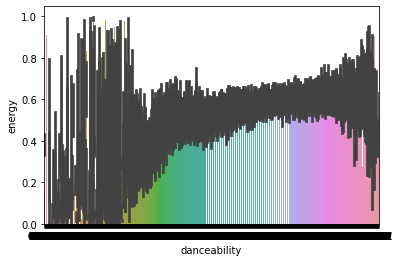

<Figure size 1440x2160 with 0 Axes>

In [68]:
sns.barplot(data=data,x=data["danceability"],y=data["energy"])
plt.figure(figsize=(20,30))
plt.show()

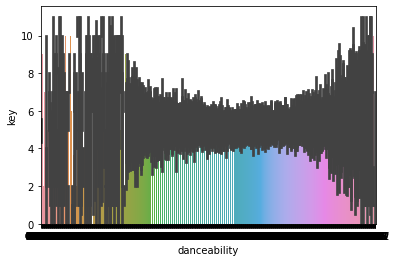

<Figure size 1440x2160 with 0 Axes>

In [83]:
sns.barplot(data=data,x=data["danceability"],y=data["key"])
plt.figure(figsize=(20,30))
plt.show()

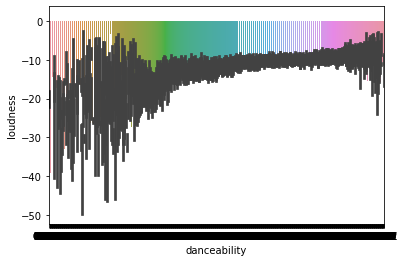

<Figure size 1440x2160 with 0 Axes>

In [84]:
sns.barplot(data=data,x=data["danceability"],y=data["loudness"])
plt.figure(figsize=(20,30))
plt.show()

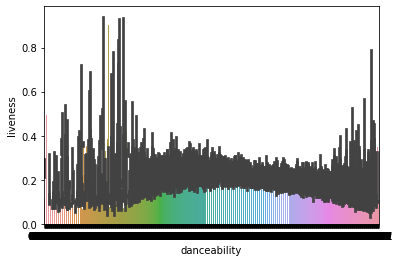

<Figure size 1440x2160 with 0 Axes>

In [85]:
sns.barplot(data=data,x=data["danceability"],y=data["liveness"])
plt.figure(figsize=(20,30))
plt.show()

A simple dashboard demonstrating the queries and the results